[*********************100%%**********************]  1 of 1 completed

ValueError: x and y must have same first dimension, but have shapes (10,) and (20, 1)

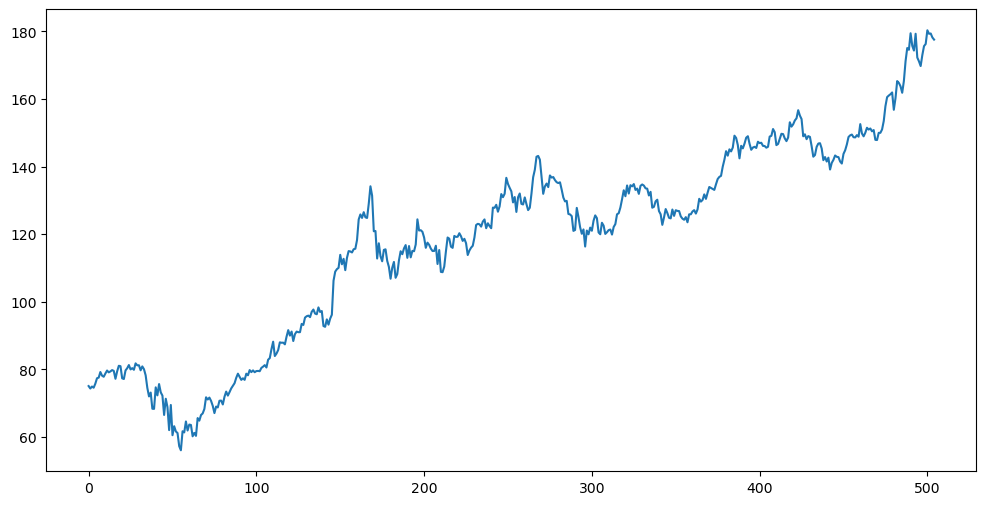

In [8]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import yfinance as yf

# Writing functions to get stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close'].values.reshape(-1, 1)

# Writing functions to prepare data for linear regression
def prepare_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Defining parameters
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-01-01'
time_steps = 10

# Getting stock data
close_prices = get_stock_data(ticker, start_date, end_date)

# Normalizing data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

# Preparing data for linear regression
x, y = prepare_data(close_prices_scaled, time_steps)

# Training a linear regression model
model = LinearRegression()
model.fit(x, y)

# Making predictions for future time steps
future_time_steps = 10
future_data = close_prices_scaled[-time_steps:]
future_x = np.array([future_data[-time_steps:, 0]])

for _ in range(future_time_steps):
    prediction = model.predict(future_x[:, -time_steps:].reshape(1, -1))
    future_x = np.append(future_x, prediction).reshape(1, -1)

# Transforming predictions back to original scale
future_predictions = scaler.inverse_transform(future_x.reshape(-1, 1))

# Plotting predictions
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='True Prices')
plt.plot(np.arange(len(close_prices), len(close_prices) + future_time_steps), future_predictions, label='Predicted Prices')
plt.title('Stock Price Prediction using Linear Regression')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()